## Импорт

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
%%time
df = pd.read_csv('autos.csv', sep=',', encoding='cp1252')
df.shape

Wall time: 1.44 s


(371528, 20)

## Описание признаков из Kaggle

- dateCrawled : when this ad was first crawled, all field-values are taken from this date
- name : "name" of the car
- seller : private or dealer
- offerType
- price : the price on the ad to sell the car
- abtest
- vehicleType
- yearOfRegistration : at which year the car was first registered
- gearbox
- powerPS : power of the car in PS
- model
- kilometer : how many kilometers the car has driven
- monthOfRegistration : at which month the car was first registered
- fuelType
- brand
- notRepairedDamage : if the car has a damage which is not repaired yet
- dateCreated : the date for which the ad at ebay was created
- nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )
- postalCode
- lastSeenOnline : when the crawler saw this ad last online

## Всякие описательные штуки

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [6]:
df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

<h1><center>EDA</center></h1>

## Для начала заполним пропуски
 Попробуем заполнить их исходя из значения других признаков

In [7]:
# Если количество лошадиных сил == 0, будем считать это пропуском
df.loc[df['powerPS'] == 0, 'powerPS'] = np.nan

In [8]:
# Посмотрим в каких признаках есть пропуски
nans = round(df.iloc[:, np.where(df.isna().sum() != 0)[0]].isna().sum() / df.shape[0] * 100, 2).to_dict()
print('\t  NaN in Pecrents')
print()
print('{}|{:^18s}| {:<12s}|'.format('', 'Columns', 'NaN Percent'))
print('-'*33)
for i in nans:
    print('{}|{:^18s}| {:<12s}|'.format('', i, str(nans[i])))

	  NaN in Pecrents

|     Columns      | NaN Percent |
---------------------------------
|   vehicleType    | 10.19       |
|     gearbox      | 5.44        |
|     powerPS      | 10.99       |
|      model       | 5.51        |
|     fuelType     | 8.99        |
|notRepairedDamage | 19.4        |


### Model/Gearbox/vehicleType/fuelType

Все эти признаки можно определить исходя из марки машины (если что-то не менялось за время эксплуатации, что маловероятно).<br>
Создадим три функции, которые помогут заполнить пропуски. Под "NaParam" я имею ввиду обозначенные выше пропущенные признаки

1) Основной доп признак - "name", получим те значения "name", где нет какого-либо "NaParam". Затем посмотрим есть ли у этих значений "name" какое-то значение "NaParam" и запишим их в пропущенные "NaParam"; <br>
2) Просто регулярками найдем в "name" какое-то значение из существующих "NaParam"; <br>
3) Заполним оставщиеся пропуски модой по "brand"

In [9]:
def fill_by_name(param):
    not_param_list = df.loc[(df[param].isna()), 'name'].unique()
    names_not_param = df.loc[(df[param].isna()==False)
                            &(df['name'].isin(not_param_list)), ['name', param]].drop_duplicates()
    unique_names = names_not_param['name'].unique()
    params_dict = dict(zip(names_not_param['name'], names_not_param[param]))
    # Записываем значения
    params_list = df.loc[(df[param].isna())
                        &(df['name'].isin(unique_names)), 'name'].apply(lambda x: params_dict[x])
    df.loc[(df[param].isna())
          &(df['name'].isin(unique_names)), param] = params_list

In [10]:
def fill_by_name_re(param):
    list_of_models = df[param].dropna().unique()
    temp = df.loc[(df[param].isna())
                 &(df['name'].str.lower().str.contains('|'.join(list_of_models))),
                              'name'].str.lower().str.findall('|'.join(list_of_models)).apply(lambda x: x[0])
    df.loc[(df[param].isna())
          &(df['name'].str.lower().str.contains('|'.join(list_of_models))), param] = temp

In [11]:
def fill_by_mode(param):
    most_popular_model = df.groupby(['brand'])[param].agg(lambda x: x.value_counts().index[0]).to_dict()
    temp = df.loc[(df[param].isna())
                 &(df['brand'].isin(most_popular_model.keys())), 'brand'].apply(lambda x: most_popular_model[x])
    df.loc[(df[param].isna())
          &(df['brand'].isin(most_popular_model.keys())), param] = temp

In [12]:
%%time
for param in tqdm(['vehicleType', 'gearbox', 'fuelType', 'model']):
    fill_by_name(param)
    fill_by_name_re(param)
    fill_by_mode(param)
    assert df[param].isna().sum() == 0

100%|██████████| 4/4 [00:11<00:00,  2.92s/it]

Wall time: 11.7 s


### notRepairedDamage

In [13]:
# Поменяем немецкий на английский
df['notRepairedDamage'] = df['notRepairedDamage'].str.replace('nein', 'No').str.replace('ja', 'Yes')

In [14]:
df['notRepairedDamage'].value_counts(normalize=True, dropna=False)

No     0.708377
NaN    0.193956
Yes    0.097667
Name: notRepairedDamage, dtype: float64

Так как довольно много машин продаются с поломкой, то просто заполнить по моде нельзя. Так же опираться на какой-то другой категориальный признак не получится, т.к. наличие поломки не зависит от марки машины и т.д. Может только посмотреть на цену, машины с поломкой должны стоить дешевле

Попытаемся визуализировать распределение цены в зависимости от бренда и того имеется ли поломка. Также посмотрим как распределена цена в зависимости от бренда

In [15]:
# Здесь я беру пять наиболее популярных брендов, а также сглаживаю выбросы по цене, про это еще будет ниже
data_brands = df.loc[(df['price'] > df['price'].quantile(0.05))
                    &(df['price'] < df['price'].quantile(0.95))]
five_most_popular_brands = data_brands['brand'].value_counts()[:5].index

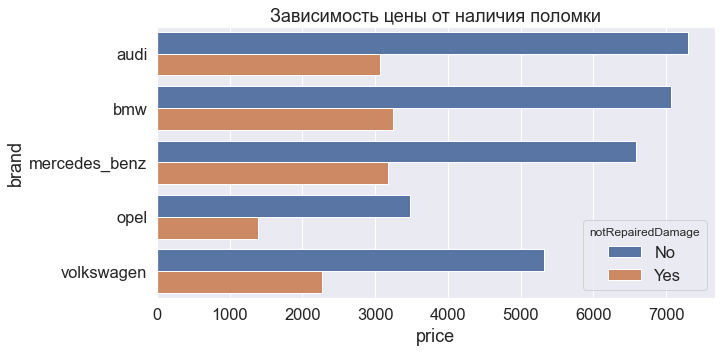

In [16]:
# Здесь вся визуализация по зависимости цены от бренда и наличия поломки
data_vis = data_brands.loc[data_brands['brand'].isin(five_most_popular_brands)]
data_vis = data_vis.groupby(['brand', 'notRepairedDamage'])['price'].agg('mean').reset_index()

plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
plt.title('Зависимость цены от наличия поломки')
sns.barplot(data=data_vis, x='price', y='brand', hue='notRepairedDamage');

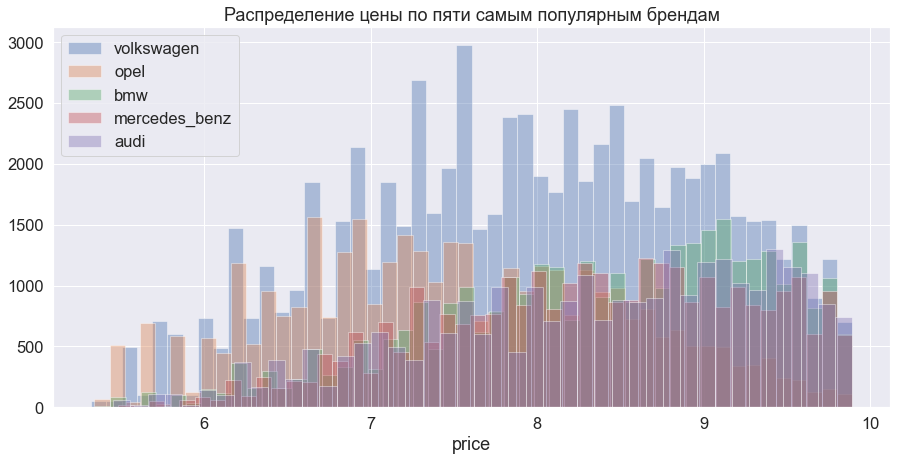

In [17]:
plt.figure(figsize=(15,7))
brands = five_most_popular_brands
for brand in brands:
    sns.distplot(np.log(data_brands.loc[data_brands['brand']==brand, 'price']), kde=False)
plt.legend(brands)
plt.title('Распределение цены по пяти самым популярным брендам')
plt.show();

В итоге мы видим, что машины с поломкой стоят примерно на треть дешевле, чем машины того же бренда, но без поломки. Кроме того видно, что цены на разные бренды распределены примерно одинаково. То есть можем по каждому бренду получить цену, ниже который это скорее всего машина с поломкой и с ее помощью дозаполнить "notRepairedDamage"

In [18]:
# Получаем словарь со списком брендов и минимальных цен
damage_price = data_brands.groupby(['brand', 'notRepairedDamage'])['price'].agg('mean').reset_index()
damage_price = damage_price.loc[damage_price['notRepairedDamage']=='Yes']
damage_price = dict(zip(damage_price.brand, damage_price.price))

# Заполняем пропуски по "notRepairedDamage"
temp = df.loc[df['notRepairedDamage'].isna(),
                ['brand', 'price']].apply(lambda x: 'Yes' if x['price'] <= damage_price[x['brand']] else 'No', axis=1)
df.loc[df['notRepairedDamage'].isna(), 'notRepairedDamage'] = temp

### powerPS

Здесь заполним по среднему значению для каждой модели

In [19]:
not_param_list = df.loc[(df['powerPS'].isna()), 'model'].unique()
powers_by_model_dict = df.loc[(df['powerPS'].isna()==False)
                             &(df['model'].isin(not_param_list))].groupby(['model'])['powerPS'].mean().to_dict()

temp = df.loc[(df['powerPS'].isna())
             &(df['model'].isin(powers_by_model_dict.keys()))].apply(lambda x: powers_by_model_dict[x['model']], axis=1)
df.loc[(df['powerPS'].isna())
      &(df['model'].isin(powers_by_model_dict.keys())), 'powerPS'] = temp

# Удалим два оставшихся пропуска
df.drop(df.loc[df['powerPS'].isna()].index, inplace=True)
df.shape

(371526, 20)

### Проверим, что больше не осталось пропусков

In [20]:
df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

В итоге мы смогли сохранить практически все данные и дозаполнили пропущенные значения исходя из эвристик.<br>
P.S. Вполне может быть, что я где-то ошибся в своих рассуждениях и так делать нельзя

# Удаление выбросов и дубликатов

In [21]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,coupe,1993,manuell,109.71504,golf,150000,0,benzin,volkswagen,Yes,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190.00000,a5,125000,5,diesel,audi,Yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163.00000,grand,125000,8,diesel,jeep,No,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75.00000,golf,150000,6,benzin,volkswagen,No,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69.00000,fabia,90000,7,diesel,skoda,No,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [22]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

### Неважные признаки

In [23]:
# Мы видим, что признак seller распределен крайне неравномерно, проще удалить часть значений
print(df['seller'].value_counts())
df = df.loc[df['seller']=='privat']
df.shape

privat        371523
gewerblich         3
Name: seller, dtype: int64


(371523, 20)

In [24]:
# То же самое, что и в seller
print(df['offerType'].value_counts())
df = df.loc[df['offerType']=='Angebot']
df.shape

Angebot    371511
Gesuch         12
Name: offerType, dtype: int64


(371511, 20)

In [25]:
# Только одно значение, можно удалять
df['nrOfPictures'].value_counts()

0    371511
Name: nrOfPictures, dtype: int64

Удаляем те признаки, которые принимают только одно значение, т.к. смысла в них нет

In [26]:
df.drop(columns=['seller', 'offerType', 'nrOfPictures'], inplace=True)
df.shape

(371511, 17)

### Model

Здесь удалим некоторые опечатки. Например, каждой модели должен соответствовать только один бренд

In [27]:
# Model
df.loc[df['model']=='golf', 'brand'].value_counts()

volkswagen        31753
sonstige_autos       28
audi                  5
smart                 3
peugeot               3
toyota                2
skoda                 1
suzuki                1
opel                  1
ford                  1
renault               1
bmw                   1
seat                  1
trabant               1
Name: brand, dtype: int64

Видим что для самой популярной модели есть опечатки, но их легко исправить

In [28]:
%%time
# Просто заполним везде самый часто встречающийся бренд
the_most_popular_brand = df.groupby(['model'])['brand'].agg(lambda x: x.value_counts().index[0]).to_dict()
temp = df.loc[df['model'].isin(the_most_popular_brand), 'model'].apply(lambda x: the_most_popular_brand[x])
df.loc[df['model'].isin(the_most_popular_brand), 'brand'] = temp

# Проверим что все ок и каждой модели соответствует только один бренд
assert len(np.where(df.groupby(['model'])['brand'].unique().apply(lambda x: True if len(x) != 1 else False))[0]) == 0

Wall time: 362 ms


### Цена

Во-первых посмотрим на выбросы по цене, а затем ее визуализируем

In [29]:
# посмотрим на различные статистики по скошенности цены
from scipy.stats import skew, kurtosis
skew(df['price']), kurtosis(df['price'])

(578.0435247826601, 345412.86175591167)

Мы видим, что цена по сравнению с нормальным распределением сильно скошена влево и намного выше, нас это не очень устраивает

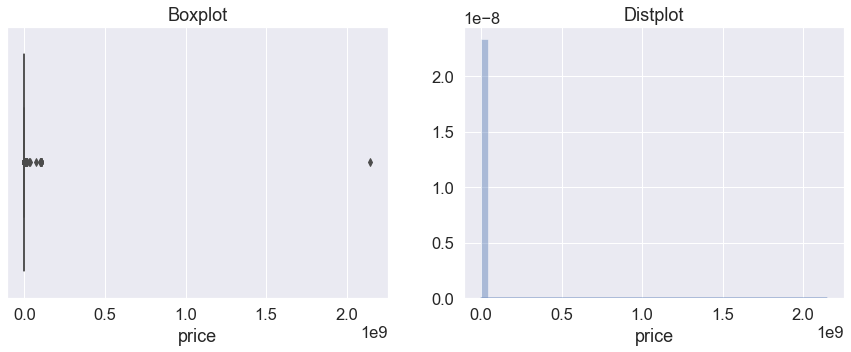

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(df['price'], ax = ax[0])
ax[0].set_title('Boxplot')
sns.distplot(df['price'], ax = ax[1])
ax[1].set_title('Distplot');

Здесь мы видим существенные выбросы, которые мы вряд ли можем объяснить какой-то очень дорогой машиной, скорее всего это просто опечатка в объявлении. Попробуем удалить по 1% сверху и 5% снизу и посмотрим что получится.

Text(0.5, 1.0, 'Distplot')

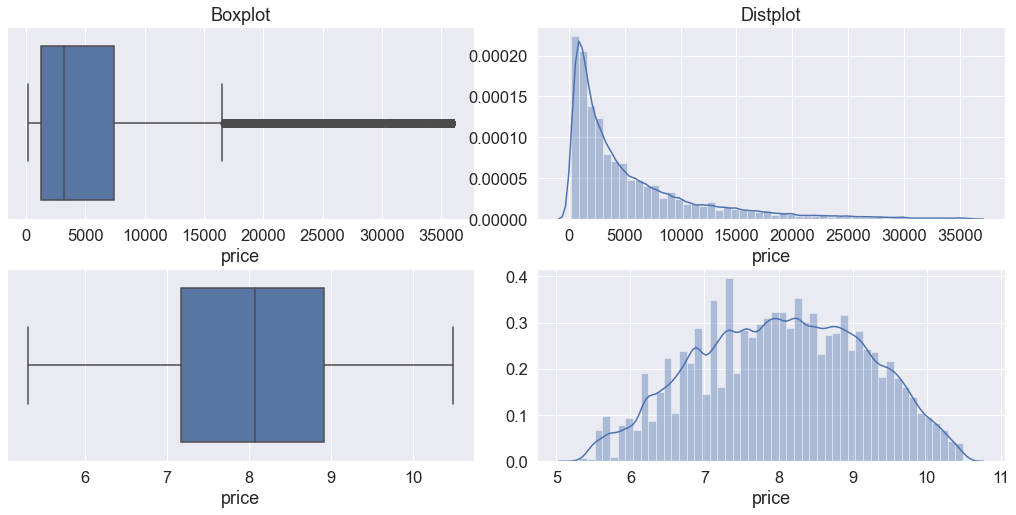

In [31]:
df_vis = df.loc[(df['price'] > df['price'].quantile(0.05))
               &(df['price'] < df['price'].quantile(0.99))]
fig, ax = plt.subplots(2,2, figsize=(15,7))
fig.tight_layout() 
# Построим по исходным ценам и увидим, что они имеют логнормальное распределение
sns.boxplot(df_vis['price'], ax = ax[0][0])
sns.distplot(df_vis['price'], ax = ax[0][1])
# Логарифмируем цену чтобы понять есть ли реально выбросы
sns.boxplot(np.log(df_vis['price']), ax = ax[1][0])
sns.distplot(np.log(df_vis['price']), ax = ax[1][1])
# Подписи
ax[0][0].set_title('Boxplot')
ax[0][1].set_title('Distplot')

Здесь все намного лучше, мы в целом видим логнормальное распределение, что должно быть вполне характерно для рынка подержанных автомобилей. Можно также посмотреть на визуализацию для трех самых популярных моделей.

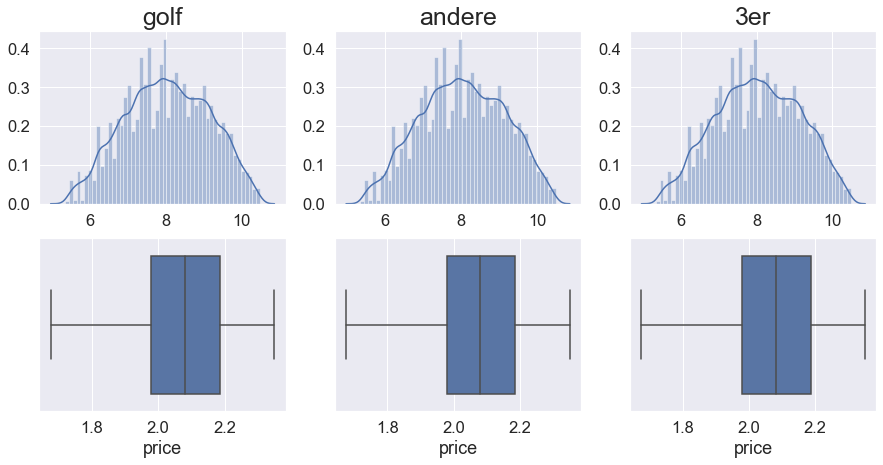

In [32]:
three_most_popular_models = df['model'].value_counts()[:3].index
df_vis = df.loc[(df['price'] > df['price'].quantile(0.05))
               &(df['price'] < df['price'].quantile(0.99))]
df_vis = df_vis.loc[df_vis['model'].isin(three_most_popular_models)]
df_vis['price'] = np.log(df_vis['price'])
fig, ax = plt.subplots(2,3, figsize=(15,7))

col_iter = 0
for model in three_most_popular_models:
    sns.distplot(df_vis['price'], ax = ax[0][col_iter])
    sns.boxplot(np.log(df_vis['price']), ax = ax[1][col_iter])
    ax[0][col_iter].set_title(model, size=25)
    ax[0][col_iter].set_xlabel('')
    col_iter += 1

В целом мы видим, что цена немного смещенна, но ничего страшного, данные вполне чистые.

In [33]:
# Давайте удалим все цены, которые меньше 100, т.к. это явно опечатка и логарифмируем цену
df.drop(df.loc[df['price'] < 100].index, inplace = True)
df['price'] = np.log(df['price'])
df.shape

(358198, 17)

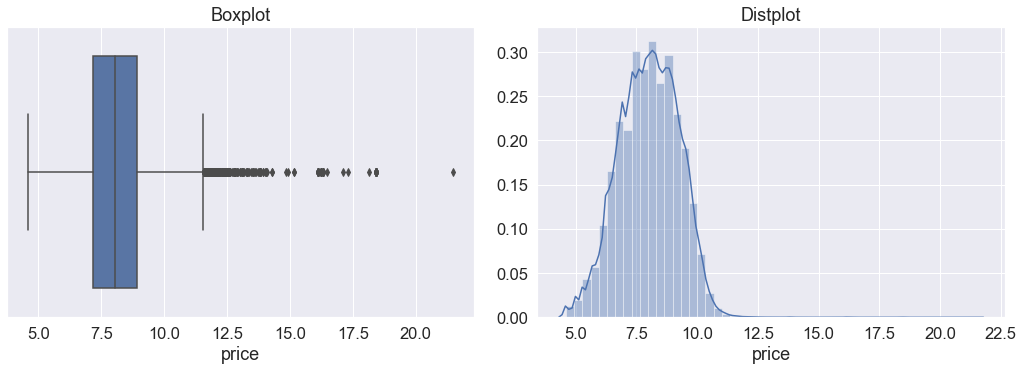

In [34]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.tight_layout() 
# Построим по исходным ценам и увидим, что они имеют логнормальное распределение
sns.boxplot(df['price'], ax = ax[0])
sns.distplot(df['price'], ax = ax[1])
ax[0].set_title('Boxplot')
ax[1].set_title('Distplot')
pass

В целом распределение ближе к нормальному, но все же лучше удалить выбросы по боксплоту для каждой отдельной модели

In [35]:
%%time
for model in tqdm(df['model'].unique()):
    prices = df.loc[df['model']==model, 'price'].values
        
    prices = df.loc[df['model']==model]
    median = np.median(prices['price'])
    q1 = np.quantile(prices['price'], 0.25)
    q3 = np.quantile(prices['price'], 0.75)
    iqr = q3 - q1
    drop_indexes = prices.loc[(prices['price'] < q1 - 1.5 * iqr)
                             |(prices['price'] > q3 + 1.5 * iqr)].index
    df.drop(drop_indexes, inplace=True)

df.shape

100%|██████████| 250/250 [00:30<00:00,  8.10it/s]

Wall time: 30.9 s


(355354, 17)

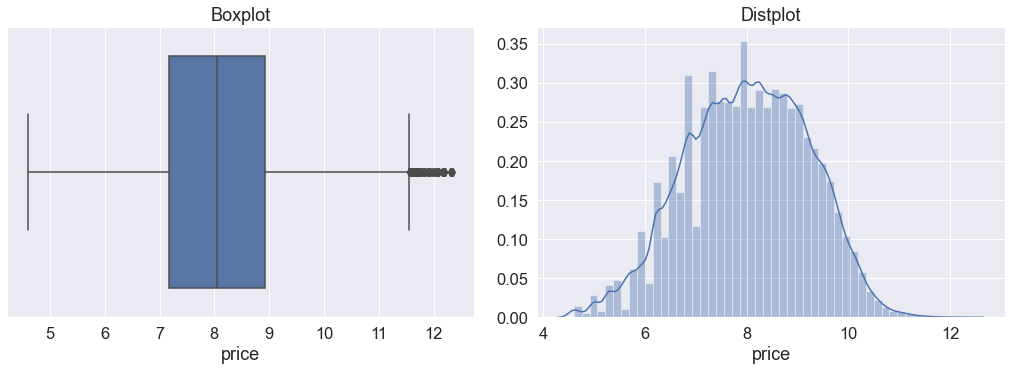

In [36]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.tight_layout() 
# Построим по исходным ценам и увидим, что они имеют логнормальное распределение
sns.boxplot(df['price'], ax = ax[0])
sns.distplot(df['price'], ax = ax[1])
ax[0].set_title('Boxplot')
ax[1].set_title('Distplot')
pass

In [37]:
# посмотрим на различные статистики по распределению цены
skew(df['price']), kurtosis(df['price'])

(-0.1282001628707012, -0.42194624977938755)

In [38]:
# Также посмотрим на смещение и выпуклость по пяти самым популярным моделям
for brand in df['model'].value_counts()[:5].index:
    temp = df.loc[df['model']==brand, 'price']
    print('Skew:', skew(temp), 'Kurtosis:', kurtosis(temp))

Skew: -0.13989789205509054 Kurtosis: -0.5013228264855427
Skew: 0.03222740721404812 Kurtosis: -0.4548374038677685
Skew: -0.22886857470932925 Kurtosis: -0.4239547714032681
Skew: -0.011935450593012969 Kurtosis: -0.5809837790022723
Skew: 0.042429925473722575 Kurtosis: -0.433623084511745


In [39]:
# Можем еще посмотреть на тест Шапиро-Уилка
from scipy.stats import shapiro
shapiro(df['price'])

C:\Users\Maksim\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9952004551887512, pvalue=0.0)

Скошенность и выпуклость распределения находятся в пределах нормы

### abtest/gearbox/notRepairedDamage

Проведем ANOVA тест для всех этих признаков чтобы посмотреть имеет ли смысл разделение на них

In [40]:
from scipy.stats import f_oneway

In [41]:
#abtest
temp1 = df.loc[df['abtest']=='test', 'price']
temp2 = df.loc[df['abtest']=='control', 'price']
f_oneway(temp1, temp2)

F_onewayResult(statistic=0.07669488286070796, pvalue=0.7818275597726386)

In [42]:
#gearbox
temp1 = df.loc[df['gearbox']=='manuell', 'price']
temp2 = df.loc[df['gearbox']=='automatik', 'price']
f_oneway(temp1, temp2)

F_onewayResult(statistic=33090.02695297784, pvalue=0.0)

In [43]:
#notRepairedDamage
temp1 = df.loc[df['notRepairedDamage']=='Yes', 'price']
temp2 = df.loc[df['notRepairedDamage']=='No', 'price']
f_oneway(temp1, temp2)

F_onewayResult(statistic=108172.61943711602, pvalue=0.0)

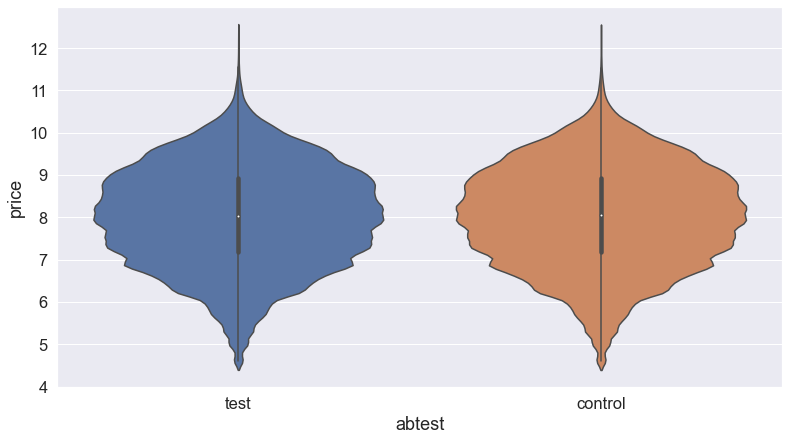

In [44]:
# Внимательней посмотрим на abtest, скорее всего там нет разницы между группами
plt.figure(figsize=(13,7))
sns.violinplot(data=df, x='abtest', y='price');

Видно что разницы между разными группами по abtest нет, так что можем удалить этот признак

In [45]:
df.drop(columns=['abtest'], inplace=True)
df.shape

(355354, 16)

In [46]:
df.columns

Index(['dateCrawled', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode',
       'lastSeen'],
      dtype='object')

### Даты

In [47]:
# Дата скраппинга
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
year = df['dateCrawled'].dt.year.unique()
month = df['dateCrawled'].dt.month.unique()
print('Year:', *year, 'Month:', *month)

Year: 2016 Month: 3 4


In [48]:
# Дата последнего просмотра
df['lastSeen'] = pd.to_datetime(df['lastSeen'])
year = df['lastSeen'].dt.year.unique()
month = df['lastSeen'].dt.month.unique()
print('Year:', *year, 'Month:', *month)

Year: 2016 Month: 4 3


Медианное количество дней: 5.0


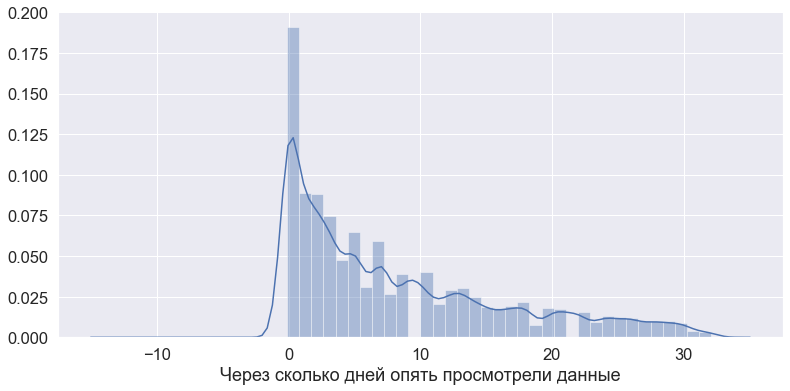

In [49]:
# Посмотрим через сколько дней после сбора данных они опять просматривались
plt.figure(figsize=(13,6))
sns.distplot((df['lastSeen'] - df['dateCrawled']).dt.days)
plt.xlabel('Через сколько дней опять просмотрели данные')
print('Медианное количество дней:', np.median((df['lastSeen'] - df['dateCrawled']).dt.days))

In [50]:
# Дата создания объявления
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
year = df['dateCreated'].dt.year.unique()
month = df['dateCreated'].dt.month.unique()
print('Year:', *year, 'Month:', *month)
print()
print('Распределение по годам:')
print(df['dateCreated'].dt.year.value_counts())

Year: 2016 2015 2014 Month: 3 4 2 1 6 11 12 9 8 10

Распределение по годам:
2016    355324
2015        29
2014         1
Name: dateCreated, dtype: int64


In [51]:
# Посмотрим есть ли выбросы по месяцам
df.loc[df['dateCreated'].dt.year==2016, 'dateCreated'].dt.month.value_counts()

3    297204
4     57638
2       407
1        75
Name: dateCreated, dtype: int64

In [52]:
# Уберем все объявления, которые были созданы до 2016 года
df = df.loc[df['dateCreated'].dt.year==2016] 
df.shape

(355324, 16)

Объявления просматривались примерно через пять дней после того, как собрали данные, надо будет при создании признаков для моделей посмотреть можем ли мы узнать была ли продана машина за этот период (не понятно автору датасета было лень собирать данные или машины быстро продаются). Также видим немного выбросов в дате создания объявления, их просто удалим.

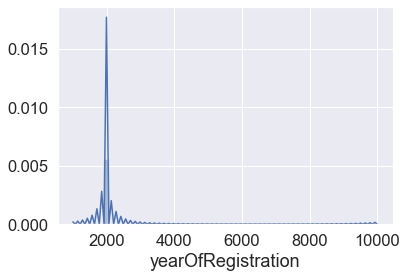

In [53]:
# Год регистрации
sns.distplot(df['yearOfRegistration']);

Здесь видим очень большие хвосты, удалим все данные, которые лежат вне интервала 1980 - 2016.

In [54]:
df = df.loc[(df['yearOfRegistration']>=1980)
           &(df['yearOfRegistration']<=2016)]
df.shape

(337978, 16)

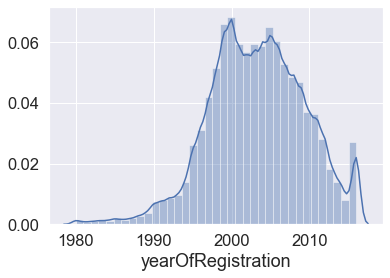

In [55]:
sns.distplot(df['yearOfRegistration'], bins=len(df['yearOfRegistration'].unique()));

Теперь намного лучше и в целом ожидаемо, как-то менять признак не стоит, т.к. затем его можно будет использовать чтобы получить новые признаки (сколько машине лет)

In [56]:
df.columns

Index(['dateCrawled', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode',
       'lastSeen'],
      dtype='object')

### Пробег

In [57]:
df['kilometer'].value_counts()

150000    219261
125000     35425
100000     14383
90000      11709
80000      10306
70000       9151
60000       8184
50000       7101
40000       6004
30000       5524
20000       5026
5000        4321
10000       1583
Name: kilometer, dtype: int64

Здесь ничего интересного, можно было бы посмотреть на связь между пробегом и датой регистрации на предмет выбросов, но какой-то точной эвристики не придумать, так что пусть будет как есть. Тем более дальше мы будем использовать его как таргет

### ANOVA vehicleType and fuelType

In [58]:
# vehicleType
l = []
for i in df['vehicleType'].unique():
    l.append(df.loc[df['vehicleType']==i, 'price'])
f_oneway(*l)

F_onewayResult(statistic=8366.180484557284, pvalue=0.0)

In [59]:
# fuelType
l = []
for i in df['fuelType'].unique():
    l.append(df.loc[df['fuelType']==i, 'price'])
f_oneway(*l)

F_onewayResult(statistic=7376.381711188071, pvalue=0.0)

Есть смысл такого деления, оставляем

## Корреляция

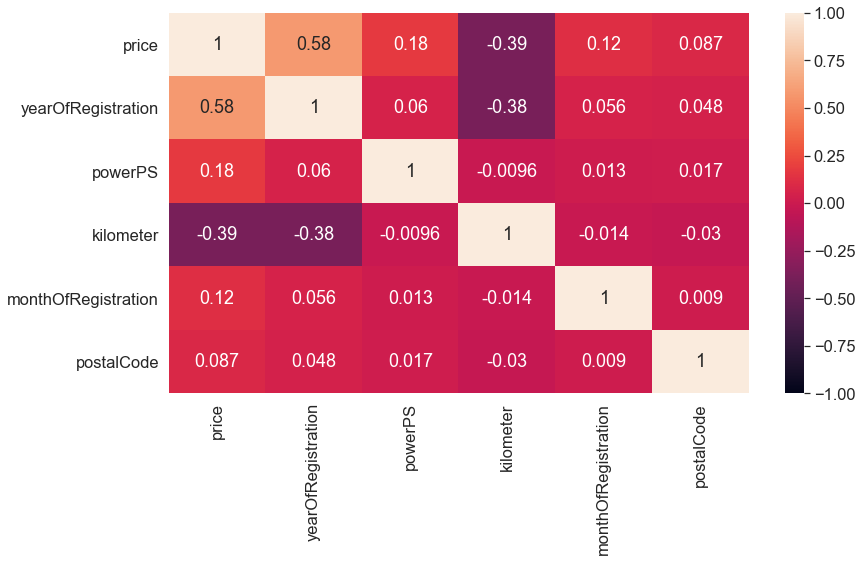

In [60]:
plt.figure(figsize=(13, 7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

Видим, что самая большая корреляция (с ценой) у года регистрации и количества лошадиных сил. В целом это логично, как в прошлом показал ANOVA, категориальные признаки тоже скорее всего коррелированы с ценой.

<h1><center>Train Model</center></h1>

## Feature Engineering

Нашим таргетом будет пробег автомобиля и весь FE будет исходя и этого

In [61]:
df.reset_index(drop=True, inplace=True)

In [62]:
df.columns

Index(['dateCrawled', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode',
       'lastSeen'],
      dtype='object')

### Даты

Сами по себе даты особой смысловой нагрузки не несут, попробуем составить из них более значимые признаки

Посмотрим сколько машина продавалась

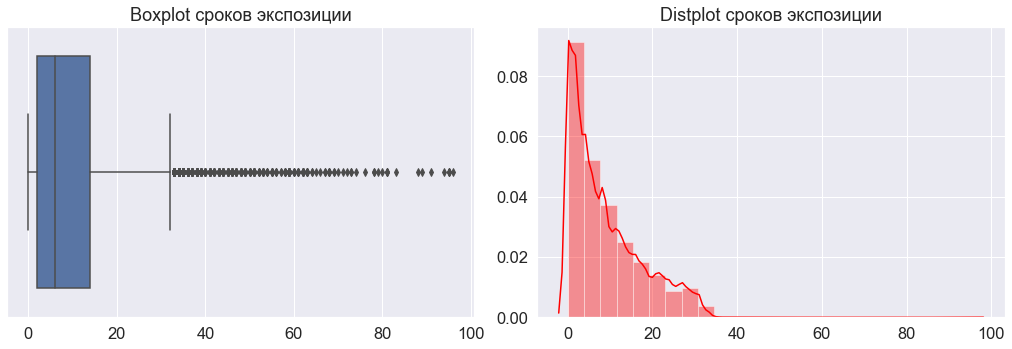

In [63]:
exposition_temp = df['lastSeen'] - df['dateCreated']
exposition_temp = exposition_temp.dt.days
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.tight_layout() 

sns.boxplot(exposition_temp, ax = ax[0])
sns.distplot(exposition_temp, ax = ax[1], bins=25, color='red')
ax[0].set_title('Boxplot сроков экспозиции')
ax[1].set_title('Distplot сроков экспозиции')
pass

В целом распределение вполне соответствует ожиданиям, скорее всего машины так и должны продаваться. Однако есть довольно большая проблема, мы не знаем как подавать этот признак на вход при использовании модели заказчиком, так что использовать его в дальнейшем не будем.

Год регистрации не так информативен как возраст машины, переделаем его с учетом того, что данные собирались в 2016 году

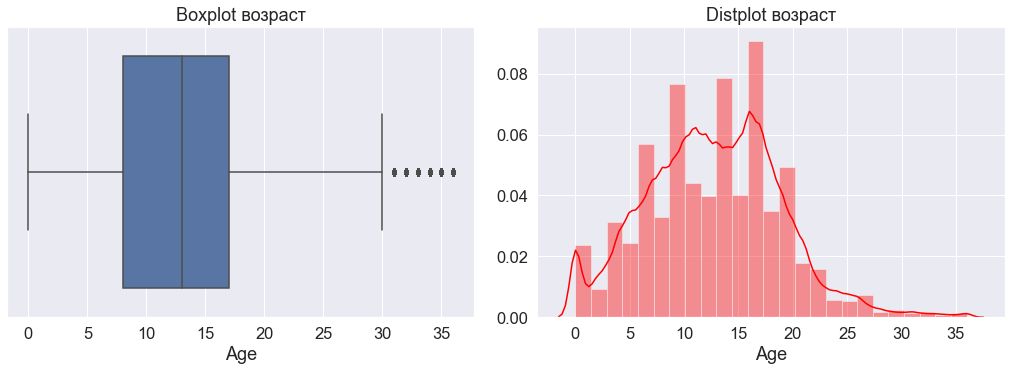

In [64]:
df['Age'] = 2016 - df['yearOfRegistration']

fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.tight_layout() 

sns.boxplot(df['Age'], ax = ax[0])
sns.distplot(df['Age'], ax = ax[1], bins=25, color='red')
ax[0].set_title('Boxplot возраст')
ax[1].set_title('Distplot возраст')
pass

Тоже вполне нормальные данные, как-то дополнительно их редактировать не стоит. Возможно есть смысл разбить на категориальные переменные, но данные распределены в целом нормально, так что не понятно на какие отрезки разбить

In [65]:
df.columns

Index(['dateCrawled', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode',
       'lastSeen', 'Age'],
      dtype='object')

### Перекодируем различные признаки

Часть признаков категориальные, приведем их к нужному формату. Также некоторые признаки просто перекодируем в более удобный формат

#### Gearbox

In [66]:
# gearbox в manual gearbox (binary)
print(df['gearbox'].value_counts(normalize=True))
df['manual gearbox'] = (df['gearbox'] == 'manuell').astype('int')

manuell      0.77687
automatik    0.22313
Name: gearbox, dtype: float64


#### vehicleType

In [67]:
# vehicleType
print(df['vehicleType'].value_counts(normalize=True))

limousine     0.297537
kleinwagen    0.246676
kombi         0.197093
bus           0.087766
cabrio        0.065859
coupe         0.052719
suv           0.042340
andere        0.010010
Name: vehicleType, dtype: float64


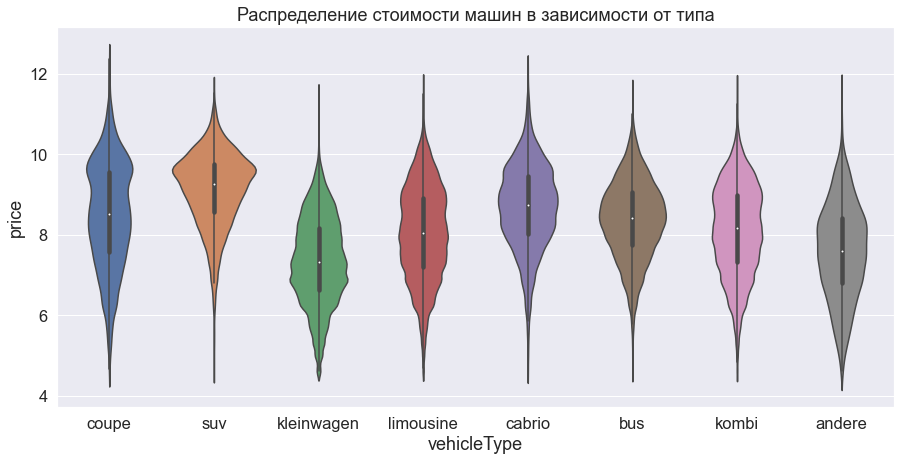

In [68]:
plt.figure(figsize=(15,7))
plt.title('Распределение стоимости машин в зависимости от типа')
sns.violinplot(data=df, x='vehicleType', y='price');

В данном случае не понятно на сколько сильна разница между разными типами машин, проще всего сделать One Hot Encoding

In [69]:
df = pd.get_dummies(data=df, columns=['vehicleType'], prefix='VehicleType', prefix_sep='_')
df.shape

(337978, 25)

#### powerPS

В лошадиных силах много выбросов, надо удалить часть и попробовать сгладить

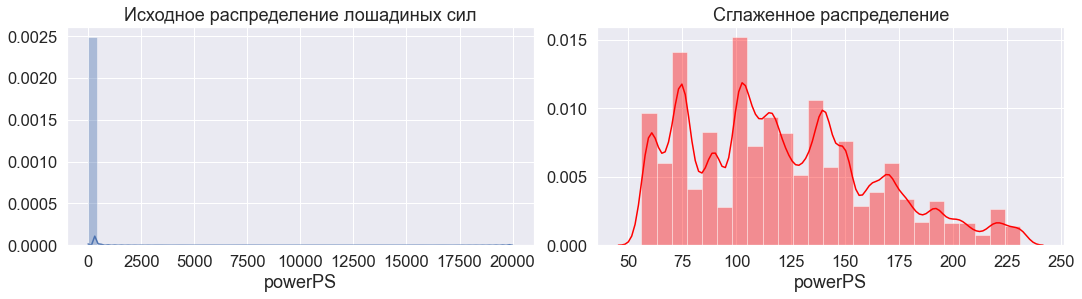

In [70]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
fig.tight_layout() 

sns.distplot(df['powerPS'], ax = ax[0])
sns.distplot(df.loc[(df['powerPS'] > df['powerPS'].quantile(0.05))
                    &(df['powerPS'] < df['powerPS'].quantile(0.95)), 'powerPS'],
             ax = ax[1], bins=25, color='red')
ax[0].set_title('Исходное распределение лошадиных сил')
ax[1].set_title('Сглаженное распределение')
pass

Также как и с ценой пройдемся циклом по model и удалим все что выходит за боксплот

In [71]:
# Скорее всего лошадиных сил не может быть меньше 50
df = df.loc[df['powerPS'] >= 50]
df.shape

(333038, 25)

In [72]:
%%time
for model in tqdm(df['model'].unique()):       
    powers = df.loc[df['model']==model]
    q1 = np.quantile(powers['powerPS'], 0.25)
    q3 = np.quantile(powers['powerPS'], 0.75)
    iqr = q3 - q1
    drop_indexes = powers.loc[(powers['powerPS'] < q1 - 1.5 * iqr)
                             |(powers['powerPS'] > q3 + 1.5 * iqr)].index
    df.drop(drop_indexes, inplace=True)

df.shape

100%|██████████| 249/249 [00:21<00:00, 11.65it/s]

Wall time: 21.4 s


(314971, 25)

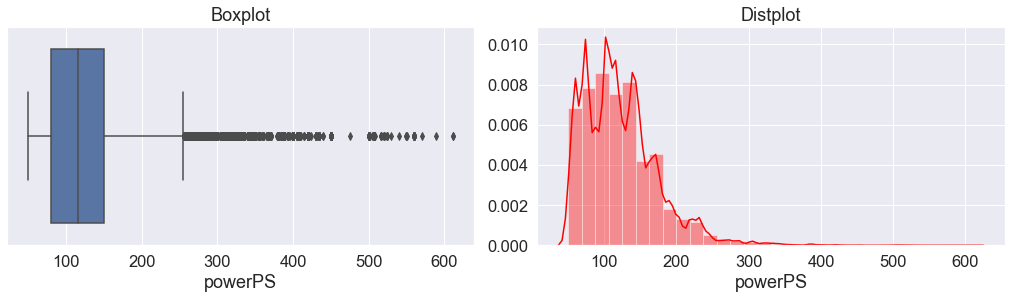

In [73]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
fig.tight_layout() 

sns.boxplot(df['powerPS'], ax = ax[0])
sns.distplot(df['powerPS'], ax = ax[1], bins=30, color='red')
ax[0].set_title('Boxplot')
ax[1].set_title('Distplot')
pass

Можно оставить признак в том виде, который есть сейчас, хотя он и сильно скошен

#### Model/Brand

Так как у нас слишком много моделей и брендов, делать OneHotEncoding смысла нет, заполнение по средней цене для каждой модели создаст лики. Заполним по последней цене (возьмем среднее из них, т.к. . Кроме того, т.к. "notRepairedDamage" оказывает сильное влияние на цену, его тоже будем использовать

In [74]:
model_max_dateCreated_0 = df.loc[df['notRepairedDamage']=='No'].groupby('model')['dateCreated'].max().to_dict()
model_max_dateCreated_1 = df.loc[df['notRepairedDamage']=='Yes'].groupby('model')['dateCreated'].max().to_dict()

In [75]:
for i in tqdm(model_max_dateCreated_0.keys()):
    date = model_max_dateCreated_0[i]
    temp = df.loc[(df['model']==i)
                  &(df['dateCreated']==date)
                  &(df['notRepairedDamage']=='No'), 'price'].mean()
    df.loc[(df['model']==i)
          &(df['notRepairedDamage']=='No'), 'model'] = temp
for i in tqdm(model_max_dateCreated_1.keys()):
    date = model_max_dateCreated_1[i]
    temp = df.loc[(df['model']==i)
                  &(df['dateCreated']==date)
                  &(df['notRepairedDamage']=='Yes'), 'price'].mean()
    df.loc[(df['model']==i)
          &(df['notRepairedDamage']=='Yes'), 'model'] = temp
    
df['model'] = df['model'].astype('float')

100%|██████████| 237/237 [00:17<00:00, 13.89it/s]


In [76]:
brand_max_dateCreated_0 = df.loc[df['notRepairedDamage']=='No'].groupby('brand')['dateCreated'].max().to_dict()
brand_max_dateCreated_1 = df.loc[df['notRepairedDamage']=='Yes'].groupby('brand')['dateCreated'].max().to_dict()

In [77]:
for i in tqdm(brand_max_dateCreated_0.keys()):
    date = brand_max_dateCreated_0[i]
    temp = df.loc[(df['brand']==i)
                  &(df['dateCreated']==date)
                  &(df['notRepairedDamage']=='No'), 'price'].mean()
    df.loc[(df['brand']==i)
          &(df['notRepairedDamage']=='No'), 'brand'] = temp
for i in tqdm(brand_max_dateCreated_1.keys()):
    date = brand_max_dateCreated_1[i]
    temp = df.loc[(df['brand']==i)
                  &(df['dateCreated']==date)
                  &(df['notRepairedDamage']=='Yes'), 'price'].mean()
    df.loc[(df['brand']==i)
          &(df['notRepairedDamage']=='Yes'), 'brand'] = temp
    
df['brand'] = df['brand'].astype('float')

100%|██████████| 38/38 [00:02<00:00, 14.43it/s]


### fuelType

Здесь мы имее в основном (98%) бензина и дезеля, фактически остальные классы - новые элементы для нашей выборки, посмотрим удалить их, перезаписать или перекодировать. Также посмотрим есть ли какое-то влияние на цену и у скольких типов машин есть определенный вид топлива (если у нас только одна модель электрокара, это новый объект и проще удалить его)

In [78]:
df['fuelType'].value_counts(normalize=True)

benzin     0.659880
diesel     0.319347
lpg        0.017402
cng        0.001778
hybrid     0.000956
andere     0.000362
elektro    0.000276
Name: fuelType, dtype: float64

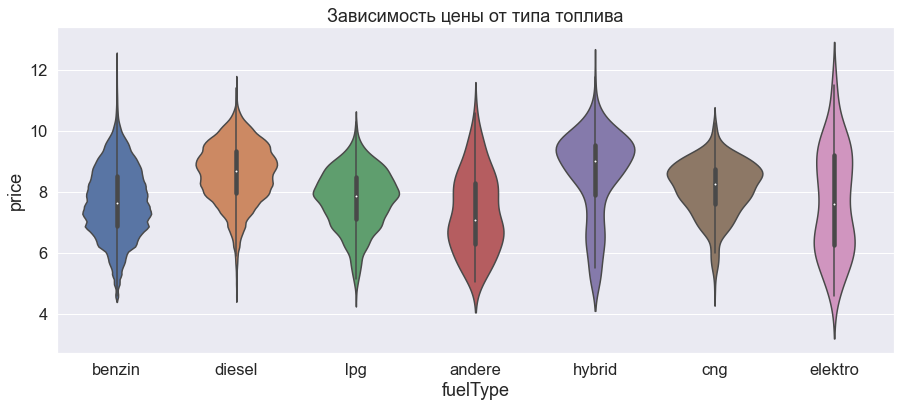

In [79]:
plt.figure(figsize=(15,6))
plt.title('Зависимость цены от типа топлива')
sns.violinplot(data=df, x='fuelType', y='price');

In [80]:
for fuel_type in df['fuelType'].unique():
    len_models = len(df.loc[df['fuelType']==fuel_type, 'model'].unique())
    len_brands = len(df.loc[df['fuelType']==fuel_type, 'brand'].unique())
    print('FuelType: {}, Models: {}, Brands: {}'.format(fuel_type.upper(), len_models, len_brands), end='\n\n')

FuelType: BENZIN, Models: 354, Brands: 76

FuelType: DIESEL, Models: 335, Brands: 72

FuelType: LPG, Models: 268, Brands: 73

FuelType: ANDERE, Models: 44, Brands: 26

FuelType: HYBRID, Models: 46, Brands: 25

FuelType: CNG, Models: 71, Brands: 27

FuelType: ELEKTRO, Models: 21, Brands: 15



В итоге мы видим, что не только есть различия по цене между разными видами топлива, но и у каждого вида топлива есть несколько моделей, т.е. нельзя сказать, что это какие-то очень уникальные значения признака. Применим One Hot Encoding

In [81]:
df = pd.get_dummies(data=df, columns=['fuelType'], prefix='FuelType', prefix_sep='_')
df.shape

(314971, 31)

#### notRepairedDamage

In [82]:
# notRepairedDamage в binary
print(df['notRepairedDamage'].value_counts(normalize=True))
df['notRepairedDamage'] = (df['notRepairedDamage'] == 'Yes').astype('int')

No     0.804309
Yes    0.195691
Name: notRepairedDamage, dtype: float64


#### postalCode

В Германии почтовый индекс делится на 10 областей по 10 тысяч в каждой, сгенерим 10 признаков, т.к. ранжировать как-то не получится

In [83]:
df['postalCode'] = pd.cut(df['postalCode'], [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000],
                          right=False, labels=False)

In [84]:
df = pd.get_dummies(data=df, columns=['postalCode'], prefix='PostalCode', prefix_sep='_')
df.shape

(314971, 40)

#### kilometer

Пробег будет нашим таргетом, посмотрим на него и переделаем в качественный

In [85]:
round(df['kilometer'].value_counts(normalize=True) * 100)

150000    66.0
125000    10.0
100000     4.0
90000      3.0
80000      3.0
70000      3.0
60000      2.0
50000      2.0
40000      2.0
30000      2.0
20000      1.0
5000       1.0
10000      0.0
Name: kilometer, dtype: float64

В основном это машины с очень большим пробегом, давайте сделаем признак бинарным

In [86]:
df.loc[df['kilometer']>100000, 'kilometer'] = 1
df.loc[df['kilometer']!=1, 'kilometer'] = 0
df['kilometer'] = df['kilometer'].astype('object')

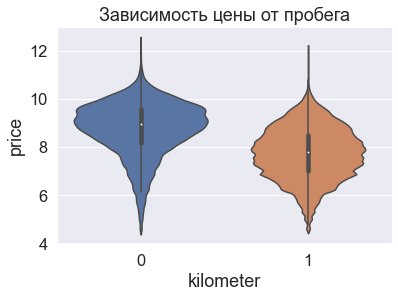

In [87]:
plt.title('Зависимость цены от пробега')
sns.violinplot(data=df, y='price', x='kilometer');

Вроде есть какая-то зависимость, будет интересно посмотреть сможем ли мы что-то спрогнозировать

#### Удалим те признаки, которые нам не нужны

In [88]:
df.drop(columns=['dateCrawled', 'name', 'yearOfRegistration', 'monthOfRegistration', 'dateCreated', 'gearbox',
                 'dateCreated', 'lastSeen'], inplace=True)
df.index = range(df.shape[0])
df.shape

(314971, 33)

In [89]:
df['kilometer'] = df['kilometer'].astype('int32')

In [90]:
# также удалим дубликаты
df.drop_duplicates(inplace=True)
df.shape

(283043, 33)

In [91]:
df.to_csv('Data_Preprocessed.csv', index=False)

##### Теперь у нас готовы все признаки, можем обучать модели

## Model Train

Предположим (так интересней), что мы хотим определять те машины, пробег которых больше 100 км.

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [93]:
df = pd.read_csv('Data_Preprocessed.csv')
df.shape

(283043, 33)

Нормализация нам нужна

In [94]:
df.columns

Index(['price', 'powerPS', 'model', 'kilometer', 'brand', 'notRepairedDamage',
       'Age', 'manual gearbox', 'VehicleType_andere', 'VehicleType_bus',
       'VehicleType_cabrio', 'VehicleType_coupe', 'VehicleType_kleinwagen',
       'VehicleType_kombi', 'VehicleType_limousine', 'VehicleType_suv',
       'FuelType_andere', 'FuelType_benzin', 'FuelType_cng', 'FuelType_diesel',
       'FuelType_elektro', 'FuelType_hybrid', 'FuelType_lpg', 'PostalCode_0',
       'PostalCode_1', 'PostalCode_2', 'PostalCode_3', 'PostalCode_4',
       'PostalCode_5', 'PostalCode_6', 'PostalCode_7', 'PostalCode_8',
       'PostalCode_9'],
      dtype='object')

In [95]:
# посмотрим на те признаки, которые не бинарные (мы их много нагенерили раньше)
normalize_columns = df.dtypes[(df.dtypes != 'uint8') & (df.dtypes != 'int64')]

In [96]:
df[normalize_columns.keys()].head()

,price,powerPS,model,brand
0,6.173786,109.71504,7.046071,6.969055
1,9.814656,190.00000,9.903438,7.847318
2,9.190138,163.00000,9.157104,9.126508
3,7.313220,75.00000,8.174838,8.282179
4,8.188689,69.00000,9.039625,9.560011


Так как у нас много бинарных признаков, все остальные надо привести примерно в эти же границы.

In [97]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [98]:
normalize_columns = ['price', 'powerPS', 'model', 'brand', 'Age']
scaler = MinMaxScaler()
df[normalize_columns] = scaler.fit_transform(df[normalize_columns])

Качество будем тестировать на тестовой выборке

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['kilometer']), df['kilometer'],
                                                    test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((226434, 32), (56609, 32))

В качестве baseline возьмем наивный классификатор, его качество будет около 76%

In [101]:
df['kilometer'].value_counts(normalize=True)

1    0.762121
0    0.237879
Name: kilometer, dtype: float64

Обучим KNeighbors без поиска гиперпараметров

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, recall_score

In [103]:
%%time
model = KNeighborsClassifier()
model.fit(X_train, y_train)

Wall time: 47.9 s


KNeighborsClassifier()

In [104]:
%%time
y_pred = model.predict(X_test)

Wall time: 2min 30s


Посчитаем все четыре метрики. Мы хотим определять максимальное количество машин с пробегом больше 100000 км., для этого лучше всего опираться на recall, но мы будем больше смотреть на f1, т.к. на ошибку второго рода тоже надо обращать внимание.

In [105]:
accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
print('Accuracy: {}, Precision: {}, Recall: {}, F1: {}'.format(accuracy, precision, recall, f1))

Accuracy: 0.85, Precision: 0.88, Recall: 0.94, F1: 0.91


F1 получилась равной 0.91, что в целом неплохо, но давайте поиграем с подбором параметров. Посмотрим на разное количество соседей для двух типов весов

In [106]:
f1_unform = []
f1_distance = []

for neighbors in tqdm(range(1, 20)):
    # init models
    model_uniform = KNeighborsClassifier(n_neighbors=neighbors, weights='uniform')
    model_distance = KNeighborsClassifier(n_neighbors=neighbors, weights='distance')
    # fit models
    model_uniform.fit(X_train, y_train)
    model_distance.fit(X_train, y_train)
    # get score
    uniform_score = round(f1_score(y_test, model_uniform.predict(X_test)), 3)
    distance_score = round(f1_score(y_test, model_distance.predict(X_test)), 3)
    f1_unform.append(uniform_score)
    f1_distance.append(distance_score)

100%|██████████| 19/19 [2:18:11<00:00, 436.38s/it]  


In [107]:
# считается долго, так что на всякий случай сохраним
import pickle

with open('f1_unform.pkl', 'wb') as f:
    pickle.dump(f1_unform, f)
    
with open('f1_distance.pkl', 'wb') as f:
    pickle.dump(f1_distance, f)

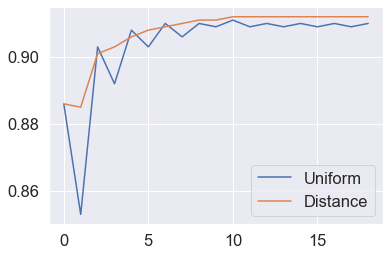

In [108]:
# Визуализируем зависимость качества от количества соседей
plt.plot(f1_unform)
plt.plot(f1_distance)
plt.legend(['Uniform', 'Distance'])
pass

Видим, что веса лучше брать в зависимости от их расстояния, а наилучшее количество соседей - 17. Посмотри метрики для этой модели.

In [109]:
%%time
model = KNeighborsClassifier(n_neighbors=17, weights='distance')
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

Wall time: 17min 50s


In [110]:
accuracy = round(accuracy_score(y_test, y_pred_test), 2)
precision = round(precision_score(y_test, y_pred_test), 2)
recall = round(recall_score(y_test, y_pred_test), 2)
f1 = round(f1_score(y_test, y_pred_test), 2)
print('Test Scores')
print('Accuracy: {}, Precision: {}, Recall: {}, F1: {}'.format(accuracy, precision, recall, f1))
print()
accuracy = round(accuracy_score(y_train, y_pred_train), 2)
precision = round(precision_score(y_train, y_pred_train), 2)
recall = round(recall_score(y_train, y_pred_train), 2)
f1 = round(f1_score(y_train, y_pred_train), 2)
print('Train Scores')
print('Accuracy: {}, Precision: {}, Recall: {}, F1: {}'.format(accuracy, precision, recall, f1))

Test Scores
Accuracy: 0.86, Precision: 0.88, Recall: 0.95, F1: 0.91

Train Scores
Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


Не прям чтоб сильно усилили качество, но все равно приятно. Также видим, что модель переобучается, возможно стоило прорядить данные на предмет дубликатов.

Давайте посмотрим другие классификаторы, но сразу с гиперпараметрами, которые подберем через optuna (у них как раз в июле версия 2.0 вышла).

In [111]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [112]:
def objective(trial):
    # params
    C = trial.suggest_uniform('C', 0.0, 5)
    classifier = LogisticRegression(C=C, n_jobs=-1)
    score = cross_val_score(classifier, X_train, y_train, n_jobs=-1, cv=5, scoring='f1_macro')
    f1_opt = score.mean()
    return f1_opt

In [113]:
%%time
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, timeout=30*60, show_progress_bar=True)

[I 2020-10-10 10:47:18,609] A new study created in memory with name: no-name-f3a70218-6322-4505-b72c-e6b6842aaa47
C:\Users\Maksim\anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


[I 2020-10-10 10:47:24,630] Trial 0 finished with value: 0.7782898064286206 and parameters: {'C': 4.371739192638427}. Best is trial 0 with value: 0.7782898064286206.
[I 2020-10-10 10:47:29,868] Trial 1 finished with value: 0.7782696990163686 and parameters: {'C': 2.6218238057393473}. Best is trial 0 with value: 0.7782898064286206.
[I 2020-10-10 10:47:34,211] Trial 2 finished with value: 0.7782762323833436 and parameters: {'C': 3.567043178939857}. Best is trial 0 with value: 0.7782898064286206.
[I 2020-10-10 10:47:38,433] Trial 3 finished with value: 0.7780893332179091 and parameters: {'C': 0.9933217392630816}. Best is trial 0 with value: 0.7782898064286206.
[I 2020-10-10 10:47:42,666] Trial 4 finished with value: 0.7781677737529925 and parameters: {'C': 1.6664662018315783}. Best is trial 0 with value: 0.7782898064286206.
[I 2020-10-10 10:47:46,980] Trial 5 finished with value: 0.7777868339932675 and parameters: {'C': 0.40647357306569765}. Best is trial 0 with value: 0.7782898064286206.

In [114]:
study.best_params

{'C': 4.514112059719697}

In [115]:
def objective(trial):
    # params
    criterion
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    classifier = RandomForestClassifier(n_estimators=n_estimators)
    score = cross_val_score(classifier, X_train, y_train, n_jobs=-1, cv=5, scoring='f1_macro')
    f1_opt = score.mean()
    return f1_opt

In [116]:
%%time
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, timeout=30*60, show_progress_bar=True)

[I 2020-10-10 10:49:30,431] A new study created in memory with name: no-name-d701d9c6-c3f0-41df-8e11-c4de2882cf49
C:\Users\Maksim\anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


[I 2020-10-10 10:50:49,101] Trial 0 finished with value: 0.8069927982206048 and parameters: {'n_estimators': 187}. Best is trial 0 with value: 0.8069927982206048.
[I 2020-10-10 10:51:43,813] Trial 1 finished with value: 0.8072793345451534 and parameters: {'n_estimators': 133}. Best is trial 1 with value: 0.8072793345451534.
[I 2020-10-10 10:53:01,571] Trial 2 finished with value: 0.8072587346305655 and parameters: {'n_estimators': 188}. Best is trial 1 with value: 0.8072793345451534.
[I 2020-10-10 10:53:50,407] Trial 3 finished with value: 0.8071306057703612 and parameters: {'n_estimators': 115}. Best is trial 1 with value: 0.8072793345451534.
[I 2020-10-10 10:54:25,340] Trial 4 finished with value: 0.8064842282706302 and parameters: {'n_estimators': 82}. Best is trial 1 with value: 0.8072793345451534.
[I 2020-10-10 10:55:36,156] Trial 5 finished with value: 0.8069987993320671 and parameters: {'n_estimators': 171}. Best is trial 1 with value: 0.8072793345451534.
[I 2020-10-10 10:56:15,

In [117]:
study.best_params

{'n_estimators': 168}

In [118]:
%%time
# init models
logreg = LogisticRegression(C=4.514112059719697)
rf = RandomForestClassifier(n_estimators=168)
# fit models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

C:\Users\Maksim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Wall time: 43.7 s


RandomForestClassifier(n_estimators=150)

In [119]:
%%time
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

Wall time: 2.28 s


In [120]:
accuracy = round(accuracy_score(y_test, y_pred_logreg), 2)
precision = round(precision_score(y_test, y_pred_logreg), 2)
recall = round(recall_score(y_test, y_pred_logreg), 2)
f1 = round(f1_score(y_test, y_pred_logreg), 2)
print('Test Scores LogReg')
print('Accuracy: {}, Precision: {}, Recall: {}, F1: {}'.format(accuracy, precision, recall, f1))
print()
accuracy = round(accuracy_score(y_test, y_pred_rf), 2)
precision = round(precision_score(y_test, y_pred_rf), 2)
recall = round(recall_score(y_test, y_pred_rf), 2)
f1 = round(f1_score(y_test, y_pred_rf), 2)
print('Train Scores RF')
print('Accuracy: {}, Precision: {}, Recall: {}, F1: {}'.format(accuracy, precision, recall, f1))

Test Scores LogReg
Accuracy: 0.85, Precision: 0.87, Recall: 0.95, F1: 0.91

Train Scores RF
Accuracy: 0.87, Precision: 0.89, Recall: 0.95, F1: 0.92


В целом результаты не сильно различаются

### PCA

P.S. Мы должны применить SVM, но он не очень хорошо работает с 280000 данных, так что я оставил только 50000

In [121]:
df = df.sample(50000)

In [122]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [123]:
X, y = df.drop(columns='kilometer'), df['kilometer']

In [124]:
pca = PCA(n_components=2)
new_X = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.19324749, 0.10741438])

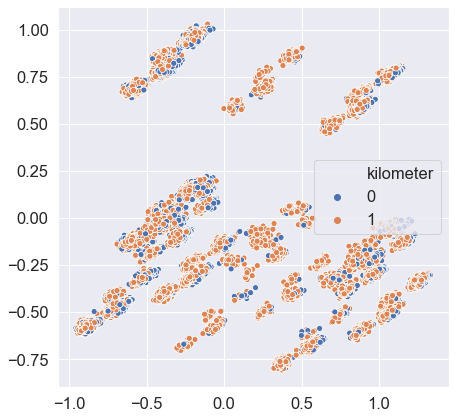

In [125]:
plt.figure(figsize=(7,7))
sns.scatterplot(new_X[:, 0], new_X[:, 1], hue=y);

Две главных компоненты объясняют около 20% дисперсии, как следствие, визуально мы таргет вообще никак не можем отделить, так что pca так себе идея, но посмотрим качество с разным количеством главных компонент

In [126]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y)
X_train.shape, X_test.shape

((37500, 2), (12500, 2))

In [127]:
%%time
model = SVC()
model.fit(X_train, y_train)

Wall time: 24.1 s


SVC()

In [128]:
y_pred = model.predict(X_test)

In [129]:
accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
print('Test Scores')
print('Accuracy: {}, Precision: {}, Recall: {}, F1: {}'.format(accuracy, precision, recall, f1))

Test Scores
Accuracy: 0.76, Precision: 0.76, Recall: 1.0, F1: 0.86


Такой себе классификатор, все относит к классу 1, я так тоже могу

In [132]:
scores = []
explained_variance = []

for i in tqdm(range(1, df.shape[1])):
    model = SVC()
    pca = PCA(n_components=i)
    new_X = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(new_X, y)
    model.fit(X_train, y_train)
    y_pred_pca = model.predict(X_test)
    f1_score_pca = f1_score(y_test, y_pred_pca)
    recall_score_pca = recall_score(y_test, y_pred_pca)
    scores.append((recall_score_pca, f1_score_pca))
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

100%|██████████| 32/32 [18:42<00:00, 35.08s/it]


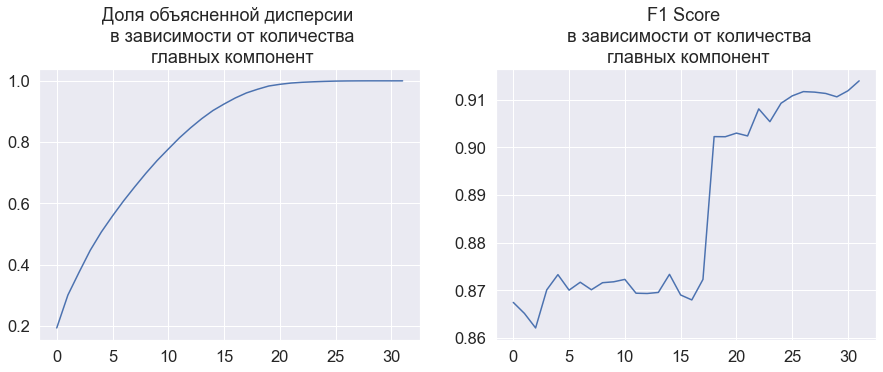

In [169]:
_, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(explained_variance)
ax[1].plot(np.array(scores)[:, 1])
ax[0].set_title('Доля объясненной дисперсии \n в зависимости от количества\n главных компонент')
ax[1].set_title('F1 Score \n в зависимости от количества\n главных компонент')
pass

Примерно на 20 компонентах мы уже объясняем практически 100% всей дисперсии и примерно с этого же уровня мы получаем f1 на тестовой метрике в 0.9. В целом в данной задаче PCA не сильно нужен (совсем не нужен)